<a href="https://colab.research.google.com/github/Tower5954/TensorFlow/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem but in our case, we are going to simplify it:
Predicting a numerical variable based on some other combination of variables, even shorter...predicting a number.

In [2]:
# Import TensorFlow

import tensorflow as tf
print(tf.__version__)

2.6.0


## Creating data to view and fit

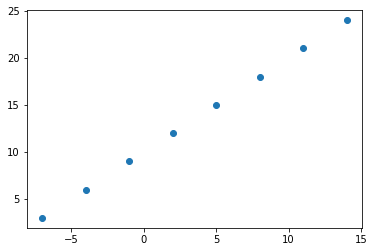

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0 ])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualise it

plt.scatter(X, y);

In [5]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Inputs and output shape

In [7]:
# Create a demo tensor for a housing price prediction problem 

house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [8]:
X[0], y[0]

(-7.0, 3.0)

In [9]:
X[1], y[1]

(-4.0, 6.0)

In [10]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

((), ())

In [12]:
X[0].ndim

0

In [14]:
# Turn our Numpy arrays into tensors

X = tf.constant(X)
y = tf.constant(y)

X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [15]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

(TensorShape([]), TensorShape([]))

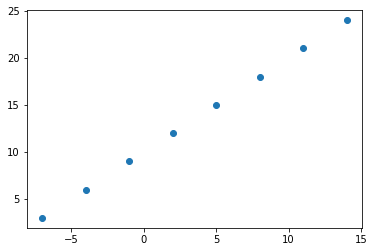

In [16]:
plt.scatter(X, y)

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compile a model** - define the loss function (In other words, the function which tell our model how wrong it is.) and the optimizer (tells our model how to improve the patterns it is learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - Letting a model find patterns between X & y (features and labels)  

In [17]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
]) 

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, #mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# 3. Fit the model 
model.fit(X, y, epochs=5)


Epoch 1/5
1/1 [==============================] - 1s 577ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 5ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 4ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 6ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 5ms/step - loss: 10.9748 - mae: 10.9748


In [19]:
# Try and make a prediction using our model 
model.predict([17.0])

array([[12.716021]], dtype=float32)

In [20]:
y_pred = model.predict([17.0])
y_pred

array([[12.716021]], dtype=float32)

In [21]:
y_pred +11

array([[23.71602]], dtype=float32)